In [2]:
import os
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib qt

In [3]:
os.chdir("D:/222experiment_material/EEG_DATA")   #修改当前工作目录
print(os.getcwd()) #获取当前工作目录
file_epoch = './practice/hulike/Data_AVSP_20/1_A.set'


D:\222experiment_material\EEG_DATA


In [4]:
epochs = mne.read_epochs(file_epoch)
# 检查基本信息以及数据集
epochs.info
#  mne.read_events(file_epoch,return_event_id=True)  # 检查事件
#epochs.copy().resample(sfreq=125) # 重降采样率，同时也能看事件

Reading D:\222experiment_material\EEG_DATA\practice\hulike\Data_AVSP_20\1_A.set ...


C:\Users\Hsukin\AppData\Local\Temp\ipykernel_19188\1301222295.py:1: RuntimeWarning: This filename (./practice/hulike/Data_AVSP_20/1_A.set) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_epoch)


ValueError: file 'D:\\222experiment_material\\EEG_DATA\\practice\\hulike\\Data_AVSP_20\\1_A.set' does not start with a file id tag

In [66]:
# 条件平均，
onno = epochs['no_pain'].average()
onpa = epochs['pain'].average()

evk_dict = {
    'pain' :onpa ,
    'no_pain' : onno
}

In [68]:
# onno.plot_topomap(times=[-0.2, 0.1, 0.4], average=0.05)   #可视化不同时段的地形图
# onno.plot_joint()   # 时域图与地形图结合

mne.viz.plot_compare_evokeds(evk_dict, combine='mean', picks=np.arange(128),
                             invert_y=True, legend=True, ci=True ,title = 'The difference of pain compassion')


combining channels using "mean"
combining channels using "mean"


[<Figure size 800x600 with 1 Axes>]

No projector specified for this dataset. Please consider the method self.add_proj.


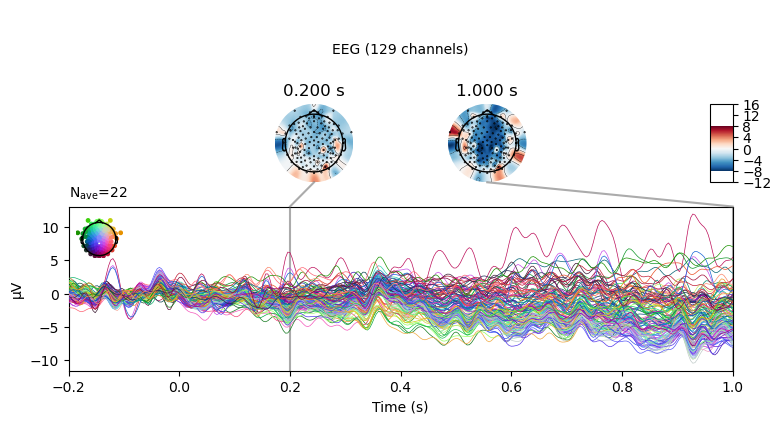

In [76]:

# 通过分配不同的权重，可以查看两种条件的脑电图之间的差异
pain_minus_vis = mne.combine_evoked([onno, onpa], weights=[1, -1])
pain_minus_vis.plot_joint(times=(0.2, 1.2))

In [79]:
# 跨被试进行epoch叠加

# grand_average = mne.grand_average([l_aud, l_vis])
# print(grand_average)


# 潜伏期、峰值振幅，P100为例
onno.get_peak( tmin= 0.08, tmax=0.12,
                              mode='pos', return_amplitude=True) # 输出为哪个通道，时间点 振幅大小


# 提取平均振幅

# Select all of the channels and crop to the time window
# channels = ['eeg54', 'eeg57', 'eeg55', 'eeg59']
# hemisphere = ['left', 'left', 'right', 'right']   # 选择感兴趣的区域
oppa_mean_roi = oppa.copy().crop(tmin=0,3, tmax=1)

# Extract mean amplitude in µV over time
mean_amp_roi = oppa_mean_roi.data.mean(axis=1) * 1e6

# Store the data in a data frame
# mean_amp_roi_df = pd.DataFrame({
#     'ch_name': l_vis_mean_roi.ch_names,
#     'hemisphere': ['left', 'left', 'right', 'right'],
#     'mean_amp': mean_amp_roi
# })

# Print the data frame
# print(mean_amp_roi_df.groupby('hemisphere').mean(numeric_only=True))




SyntaxError: positional argument follows keyword argument (2298727190.py, line 17)